#  Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation

###  Makale Hakkında
**Kaynak:** Saxena, A., Goebel, K., Simon, D., & Eklund, N. (NASA Ames & Glenn Research Centers, GE Global Research)
**Yıl:** 2008
**Bağlam:** PHM’08 (Prognostics and Health Management) Veri Yarışması
**Amaç:** Uçak gaz türbin motorlarındaki modüller için **hasar yayılımını (damage propagation)** modellemek ve **kalan kullanım ömrü (Remaining Useful Life - RUL)** tahmini için veri oluşturmak.

---

##  Genel Konsept

###  Problemin Tanımı
- Gerçek "run-to-failure" (arızaya kadar çalışma) verileri genellikle az veya gizli tutulduğu için, **sanal (simüle edilmiş)** bir veri seti oluşturulmuştur.
- Hedef: Verilen sensör verilerini kullanarak motorun kalan ömrünü tahmin etmektir.

---

##  Kullanılan Model: **C-MAPSS (Commercial Modular Aero-Propulsion System Simulation)**

**C-MAPSS** NASA tarafından geliştirilmiş bir **turbofan motor simülasyon aracıdır.**

### Özellikler:
- MATLAB®/Simulink® tabanlıdır.
- Gerçek bir **90,000 lb thrust class** motoru simüle eder.
- **Girdi Parametreleri (14 adet):**
  - Yakıt akışı (`Wf`)
  - Fan, LPC, HPC, HPT, LPT modüllerinin **akış (flow)** ve **verimlilik (efficiency)** değişkenleri
- **Çıktılar (21 sensör verisi):**
  - `T2`, `T24`, `T30`, `T50`, `P2`, `P15`, `P30`, `Nf`, `Nc`, `epr`, `phi`, `NRf`, `NRc`, `BPR`, `farB`, `htBleed`, `Nf_dmd`, `PCNfR_dmd`, `W31`, `W32`

---

##  Hasar (Degradasyon) Modelleme Yaklaşımı

### 1. **Fiziksel Model Dayanakları**
- Üç klasik modelden yararlanılmıştır:
  - **Arrhenius Modeli:** Kimyasal/termal süreçler için
  - **Coffin-Manson Modeli:** Mekanik çatlak büyümesi için
  - **Eyring Modeli:** Çok stresli durumlar için
- Bu modellerin ortak özelliği: **Hasar artışının üstel (exponential) davranış göstermesidir.**

### 2. **Uygulanan Genel Denklem**
Sağlık indeksinin zamana bağlı değişimi şu şekilde modellenmiştir:

\[
h(t) = 1 - e^{(a + b t)}
\]

ve motorun **akış (f)** ve **verimlilik (e)** bileşenleri için:
\[
e(t) = 1 - A_e e^{b_e t}, \quad f(t) = 1 - A_f e^{b_f t}
\]

Bu iki değer motorun **genel sağlık indeksini (Health Index)** belirler:
\[
H(t) = \min(m_{Fan}, m_{HPC}, m_{HPT}, m_{EGT})
\]

---

##  Uygulama Senaryosu

- Her motor farklı uçuş koşullarında (irtifa, Mach sayısı, throttle açısı) çalıştırılmıştır.
- Motor verimliliği ve akışı, **yavaş yavaş azalarak** arızaya ulaşır.
- **Anlık arızalar yoktur**, ancak “between-flight maintenance” etkisi **gürültü (noise)** olarak modele dahil edilmiştir.

### Gürültü (Noise) Türleri:
- **Üretim farkları**
- **Proses gürültüsü**
- **Sensör gürültüsü**

Veri gerçekçi olması için karışık (mixture) dağılımlar kullanılmıştır.

---

##  Veri Seti (Dataset) Özeti

| Özellik | Açıklama |
|----------|-----------|
| **Simülasyon Aracı** | C-MAPSS |
| **Degradasyon Modülü** | HPC (High Pressure Compressor) |
| **Sensör Sayısı** | 21 (Tablo 2’de listelenmiştir) |
| **Toplam Motorlar (UUTs)** | Birden fazla bağımsız motor |
| **Veri Türü** | Zaman serisi (her satır = bir uçuş döngüsü) |
| **Çıktı (Label)** | RUL (Remaining Useful Life) |
| **Noise** | Gaussian + Mixture gürültüsü |
| **Sağlık Eşiği (failure criterion)** | Health Index = 0 |
| **Kullanım Alanı** | PHM (Prognostics and Health Management) RUL tahmini |

---

##  Veri Seti Bölünmesi

| Set | Kapsam | Özellik |
|------|--------|----------|
| **Train** | Tam “run-to-failure” verileri | Sağlık 1 → 0 arası |
| **Test** | Kısmen kırpılmış | Failure’dan önce durur |
| **Validation** | Farklı RUL aralıkları (6–190 cycle) | Dayanıklılık testi için |

---

##  Performans Değerlendirmesi (Scoring)

Tahmin edilen RUL (`RUL̂`) ile gerçek RUL (`RULt`) arasındaki fark:
\[
d = RUL̂ - RUL_t
\]

Asimetrik hata fonksiyonu:
\[
s = \sum
\begin{cases}
e^{-\frac{d}{a_1}} - 1, & \text{if } d < 0\\
e^{\frac{d}{a_2}} - 1, & \text{if } d \ge 0
\end{cases}
\]
Burada:
- **a₁ = 10**, **a₂ = 13**
- **Geç tahminler (late predictions)** erken tahminlerden **daha fazla cezalandırılır.**

---

##  Anahtar Terimler

- **Prognostics:** Kalan kullanım ömrünün (RUL) tahmini
- **Health Index:** Motorun anlık sağlığını ifade eden birleşik metrik
- **Damage Propagation:** Arıza belirtilerinin zamanla büyümesi
- **Run-to-Failure Simulation:** Motorun tamamen arızaya ulaşana kadar simülasyonu
- **C-MAPSS:** NASA tarafından geliştirilen açık kaynak motor simülasyon modeli

---


In [1]:
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2025-10-13 17:25:10.159000


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import glob
import seaborn as sns
import math


In [9]:
#making columns
columns = [
    "unit_number",
    "time_in_cycles",
    "operational_setting_1",
    "operational_setting_2",
    "operational_setting_3",
]

# sensor measurements 1–26
columns += [f"sensor_measurement_{i}" for i in range(1, 27)]


In [13]:
#test
test_df =  pd.read_csv("data/train_FD001.txt",sep=' ',index_col=False,names=columns)
test_df

unit_number  time_in_cycles  operational_setting_1  \
0                1               1                -0.0007   
1                1               2                 0.0019   
2                1               3                -0.0043   
3                1               4                 0.0007   
4                1               5                -0.0019   
...            ...             ...                    ...   
20626          100             196                -0.0004   
20627          100             197                -0.0016   
20628          100             198                 0.0004   
20629          100             199                -0.0011   
20630          100             200                -0.0032   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
0                    -0.0004                  100.0                518.67   
1                    -0.0003                  100.0                518.67   
2                     0.0003                  100.0                518.67   
3                     0.0000                  100.0                518.67   
4                    -0.0002                  100.0                518.67   
...                      ...                    ...                   ...   
20626                -0.0003                  100.0                518.67   
20627                -0.0005                  100.0                518.67   
20628                 0.0000                  100.0                518.67   
20629                 0.0003                  100.0                518.67   
20630                -0.0005                  100.0                518.67   

       sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
0                    641.82               1589.70               1400.60   
1                    642.15               1591.82               1403.14   
2                    642.35               1587.99               1404.20   
3                    642.35               1582.79               1401.87   
4                    642.37               1582.85               1406.22   
...                     ...                   ...                   ...   
20626                643.49               1597.98               1428.63   
20627                643.54               1604.50               1433.58   
20628                643.42               1602.46               1428.18   
20629                643.23               1605.26               1426.53   
20630                643.85               1600.38               1432.14   

       sensor_measurement_5  ...  sensor_measurement_17  \
0                     14.62  ...                    392   
1                     14.62  ...                    392   
2                     14.62  ...                    390   
3                     14.62  ...                    392   
4                     14.62  ...                    393   
...                     ...  ...                    ...   
20626                 14.62  ...                    397   
20627                 14.62  ...                    395   
20628                 14.62  ...                    398   
20629                 14.62  ...                    395   
20630                 14.62  ...                    396   

       sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  \
0                       2388                  100.0                  39.06   
1                       2388                  100.0                  39.00   
2                       2388                  100.0                  38.95   
3                       2388                  100.0                  38.88   
4                       2388                  100.0                  38.90   
...                      ...                    ...                    ...   
20626                   2388                  100.0                  38.49   
20627                   2388                  100.0                  38.30   
20628                   2388         

In [25]:
def process_text(path,kind):
    fname=path.removeprefix("data/")
    fname=path.removesuffix(".txt")
    if (kind == "train"):
        df= pd.read_csv(filepath_or_buffer=path,sep=' ',index_col=False,names=columns)
        print(fname)
        df.to_csv(f"{fname}.csv",index=False)
    else:
        df=pd.read_csv(filepath_or_buffer=path,sep=' ',index_col=False,names=columns)
        print(fname)
        df.to_csv(f"{fname}.csv",index=False)



In [26]:
process_text(path="data/train_FD001.txt",kind="train")

data/train_FD001


In [28]:
train_files = glob.glob("data/train_FD*.txt")

for file in train_files:
    process_text(path=file, kind="train")


test_files = glob.glob("data/test_FD*.txt")

for file in test_files:
    process_text(path=file, kind="test")



data\train_FD001
data\train_FD002
data\train_FD003
data\train_FD004
data\test_FD001
data\test_FD002
data\test_FD003
data\test_FD004


In [7]:
train_1= pd.read_csv("data/train_FD001.csv")
train_1

unit_number  time_in_cycles  operational_setting_1  \
0                1               1                -0.0007   
1                1               2                 0.0019   
2                1               3                -0.0043   
3                1               4                 0.0007   
4                1               5                -0.0019   
...            ...             ...                    ...   
20626          100             196                -0.0004   
20627          100             197                -0.0016   
20628          100             198                 0.0004   
20629          100             199                -0.0011   
20630          100             200                -0.0032   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
0                    -0.0004                  100.0                518.67   
1                    -0.0003                  100.0                518.67   
2                     0.0003                  100.0                518.67   
3                     0.0000                  100.0                518.67   
4                    -0.0002                  100.0                518.67   
...                      ...                    ...                   ...   
20626                -0.0003                  100.0                518.67   
20627                -0.0005                  100.0                518.67   
20628                 0.0000                  100.0                518.67   
20629                 0.0003                  100.0                518.67   
20630                -0.0005                  100.0                518.67   

       sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
0                    641.82               1589.70               1400.60   
1                    642.15               1591.82               1403.14   
2                    642.35               1587.99               1404.20   
3                    642.35               1582.79               1401.87   
4                    642.37               1582.85               1406.22   
...                     ...                   ...                   ...   
20626                643.49               1597.98               1428.63   
20627                643.54               1604.50               1433.58   
20628                643.42               1602.46               1428.18   
20629                643.23               1605.26               1426.53   
20630                643.85               1600.38               1432.14   

       sensor_measurement_5  ...  sensor_measurement_17  \
0                     14.62  ...                    392   
1                     14.62  ...                    392   
2                     14.62  ...                    390   
3                     14.62  ...                    392   
4                     14.62  ...                    393   
...                     ...  ...                    ...   
20626                 14.62  ...                    397   
20627                 14.62  ...                    395   
20628                 14.62  ...                    398   
20629                 14.62  ...                    395   
20630                 14.62  ...                    396   

       sensor_measurement_18  sensor_measurement_19  sensor_measurement_20  \
0                       2388                  100.0                  39.06   
1                       2388                  100.0                  39.00   
2                       2388                  100.0                  38.95   
3                       2388                  100.0                  38.88   
4                       2388                  100.0                  38.90   
...                      ...                    ...                    ...   
20626                   2388                  100.0                  38.49   
20627                   2388                  100.0                  38.30   
20628                   2388         

In [8]:
train_1.drop(columns=["sensor_measurement_22","sensor_measurement_23","sensor_measurement_24","sensor_measurement_25","sensor_measurement_26"],inplace=True)
train_1

unit_number  time_in_cycles  operational_setting_1  \
0                1               1                -0.0007   
1                1               2                 0.0019   
2                1               3                -0.0043   
3                1               4                 0.0007   
4                1               5                -0.0019   
...            ...             ...                    ...   
20626          100             196                -0.0004   
20627          100             197                -0.0016   
20628          100             198                 0.0004   
20629          100             199                -0.0011   
20630          100             200                -0.0032   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
0                    -0.0004                  100.0                518.67   
1                    -0.0003                  100.0                518.67   
2                     0.0003                  100.0                518.67   
3                     0.0000                  100.0                518.67   
4                    -0.0002                  100.0                518.67   
...                      ...                    ...                   ...   
20626                -0.0003                  100.0                518.67   
20627                -0.0005                  100.0                518.67   
20628                 0.0000                  100.0                518.67   
20629                 0.0003                  100.0                518.67   
20630                -0.0005                  100.0                518.67   

       sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
0                    641.82               1589.70               1400.60   
1                    642.15               1591.82               1403.14   
2                    642.35               1587.99               1404.20   
3                    642.35               1582.79               1401.87   
4                    642.37               1582.85               1406.22   
...                     ...                   ...                   ...   
20626                643.49               1597.98               1428.63   
20627                643.54               1604.50               1433.58   
20628                643.42               1602.46               1428.18   
20629                643.23               1605.26               1426.53   
20630                643.85               1600.38               1432.14   

       sensor_measurement_5  ...  sensor_measurement_12  \
0                     14.62  ...                 521.66   
1                     14.62  ...                 522.28   
2                     14.62  ...                 522.42   
3                     14.62  ...                 522.86   
4                     14.62  ...                 522.19   
...                     ...  ...                    ...   
20626                 14.62  ...                 519.49   
20627                 14.62  ...                 519.68   
20628                 14.62  ...                 520.01   
20629                 14.62  ...                 519.67   
20630                 14.62  ...                 519.30   

       sensor_measurement_13  sensor_measurement_14  sensor_measurement_15  \
0                    2388.02                8138.62                 8.4195   
1                    2388.07                8131.49                 8.4318   
2                    2388.03                8133.23                 8.4178   
3                    2388.08                8133.83                 8.3682   
4                    2388.04                8133.80                 8.4294   
...                      ...                    ...                    ...   
20626                2388.26                8137.60                 8.4956   
20627                2388.22                8136.50                 8.5139   
20628                2388.24         

In [11]:
rul_1 = pd.DataFrame(train_1.groupby('unit_number')['time_in_cycles'].max()).reset_index()
rul_1.columns = ['unit_number', 'max']

rul_train_1 = train_1.merge(rul_1, on=['unit_number'], how='left')
rul_train_1['RUL'] = rul_train_1['max'] - rul_train_1['time_in_cycles']
rul_train_1.drop(['max'], axis=1, inplace=True)

In [12]:
rul_train_1.groupby('unit_number')['time_in_cycles'].describe() # her motorun failrun olduğu cycleı buluyoruz aslında burda

count   mean        std  min    25%    50%     75%    max
unit_number                                                           
1            192.0   96.5  55.569776  1.0  48.75   96.5  144.25  192.0
2            287.0  144.0  82.993976  1.0  72.50  144.0  215.50  287.0
3            179.0   90.0  51.816986  1.0  45.50   90.0  134.50  179.0
4            189.0   95.0  54.703748  1.0  48.00   95.0  142.00  189.0
5            269.0  135.0  77.797815  1.0  68.00  135.0  202.00  269.0
...            ...    ...        ...  ...    ...    ...     ...    ...
96           336.0  168.5  97.139076  1.0  84.75  168.5  252.25  336.0
97           202.0  101.5  58.456537  1.0  51.25  101.5  151.75  202.0
98           156.0   78.5  45.177428  1.0  39.75   78.5  117.25  156.0
99           185.0   93.0  53.549043  1.0  47.00   93.0  139.00  185.0
100          200.0  100.5  57.879185  1.0  50.75  100.5  150.25  200.0

[100 rows x 8 columns]

In [13]:
rul_train_1.describe().transpose()

count         mean           std        min  \
unit_number            20631.0    51.506568  2.922763e+01     1.0000   
time_in_cycles         20631.0   108.807862  6.888099e+01     1.0000   
operational_setting_1  20631.0    -0.000009  2.187313e-03    -0.0087   
operational_setting_2  20631.0     0.000002  2.930621e-04    -0.0006   
operational_setting_3  20631.0   100.000000  0.000000e+00   100.0000   
sensor_measurement_1   20631.0   518.670000  0.000000e+00   518.6700   
sensor_measurement_2   20631.0   642.680934  5.000533e-01   641.2100   
sensor_measurement_3   20631.0  1590.523119  6.131150e+00  1571.0400   
sensor_measurement_4   20631.0  1408.933782  9.000605e+00  1382.2500   
sensor_measurement_5   20631.0    14.620000  5.329200e-15    14.6200   
sensor_measurement_6   20631.0    21.609803  1.388985e-03    21.6000   
sensor_measurement_7   20631.0   553.367711  8.850923e-01   549.8500   
sensor_measurement_8   20631.0  2388.096652  7.098548e-02  2387.9000   
sensor_measurement_9   20631.0  9065.242941  2.208288e+01  9021.7300   
sensor_measurement_10  20631.0     1.300000  0.000000e+00     1.3000   
sensor_measurement_11  20631.0    47.541168  2.670874e-01    46.8500   
sensor_measurement_12  20631.0   521.413470  7.375534e-01   518.6900   
sensor_measurement_13  20631.0  2388.096152  7.191892e-02  2387.8800   
sensor_measurement_14  20631.0  8143.752722  1.907618e+01  8099.9400   
sensor_measurement_15  20631.0     8.442146  3.750504e-02     8.3249   
sensor_measurement_16  20631.0     0.030000  3.469531e-18     0.0300   
sensor_measurement_17  20631.0   393.210654  1.548763e+00   388.0000   
sensor_measurement_18  20631.0  2388.000000  0.000000e+00  2388.0000   
sensor_measurement_19  20631.0   100.000000  0.000000e+00   100.0000   
sensor_measurement_20  20631.0    38.816271  1.807464e-01    38.1400   
sensor_measurement_21  20631.0    23.289705  1.082509e-01    22.8942   
RUL                    20631.0   107.807862  6.888099e+01     0.0000   

                             25%        50%        75%        max  
unit_number              26.0000    52.0000    77.0000   100.0000  
time_in_cycles           52.0000   104.0000   156.0000   362.0000  
operational_setting_1    -0.0015     0.0000     0.0015     0.0087  
operational_setting_2    -0.0002     0.0000     0.0003     0.0006  
operational_setting_3   100.0000   100.0000   100.0000   100.0000  
sensor_measurement_1    518.6700   518.6700   518.6700   518.6700  
sensor_measurement_2    642.3250   642.6400   643.0000   644.5300  
sensor_measurement_3   1586.2600  1590.1000  1594.3800  1616.9100  
sensor_measurement_4   1402.3600  1408.0400  1414.5550  1441.4900  
sensor_measurement_5     14.6200    14.6200    14.6200    14.6200  
sensor_measurement_6     21.6100    21.6100    21.6100    21.6100  
sensor_measurement_7    552.8100   553.4400   554.0100   556.0600  
sensor_measurement_8   2388.0500  2388.0900  2388.1400  2388.5600  
sensor_measurement_9   9053.1000  9060.6600  9069.4200  9244.5900  
sensor_measurement_10     1.3000     1.3000     1.3000     1.3000  
sensor_measurement_11    47.3500    47.5100    47.7000    48.5300  
sensor_measurement_12   520.9600   521.4800   521.9500   523.3800  
sensor_measurement_13  2388.0400  2388.0900  2388.1400  2388.5600  
sensor_measurement_14  8133.2450  8140.5400  8148.3100  8293.7200  
sensor_measurement_15     8.4149     8.4389     8.4656     8.5848  
sensor_measurement_16     0.0300     0.0300     0.0300     0.0300  
sensor_measurement_17   392.0000   393.0000   394.0000   400.0000  
sensor_measurement_18  2388.0000  2388.0000  2388.0000  2388.0000  
sensor_measurement_19   100.0000   100.0000   100.0000   100.0000  
sensor_measurement_20    38.7000    38.8300    38.9500    39.4300  
sensor_measurement_21    23.2218    23.2979    23.3668    23.6184  
RUL                      51.0000   103.0000   155.0000   361.0000

In [16]:
rul_train_1

unit_number  time_in_cycles  operational_setting_1  \
0                1               1                -0.0007   
1                1               2                 0.0019   
2                1               3                -0.0043   
3                1               4                 0.0007   
4                1               5                -0.0019   
...            ...             ...                    ...   
20626          100             196                -0.0004   
20627          100             197                -0.0016   
20628          100             198                 0.0004   
20629          100             199                -0.0011   
20630          100             200                -0.0032   

       operational_setting_2  operational_setting_3  sensor_measurement_1  \
0                    -0.0004                  100.0                518.67   
1                    -0.0003                  100.0                518.67   
2                     0.0003                  100.0                518.67   
3                     0.0000                  100.0                518.67   
4                    -0.0002                  100.0                518.67   
...                      ...                    ...                   ...   
20626                -0.0003                  100.0                518.67   
20627                -0.0005                  100.0                518.67   
20628                 0.0000                  100.0                518.67   
20629                 0.0003                  100.0                518.67   
20630                -0.0005                  100.0                518.67   

       sensor_measurement_2  sensor_measurement_3  sensor_measurement_4  \
0                    641.82               1589.70               1400.60   
1                    642.15               1591.82               1403.14   
2                    642.35               1587.99               1404.20   
3                    642.35               1582.79               1401.87   
4                    642.37               1582.85               1406.22   
...                     ...                   ...                   ...   
20626                643.49               1597.98               1428.63   
20627                643.54               1604.50               1433.58   
20628                643.42               1602.46               1428.18   
20629                643.23               1605.26               1426.53   
20630                643.85               1600.38               1432.14   

       sensor_measurement_5  ...  sensor_measurement_13  \
0                     14.62  ...                2388.02   
1                     14.62  ...                2388.07   
2                     14.62  ...                2388.03   
3                     14.62  ...                2388.08   
4                     14.62  ...                2388.04   
...                     ...  ...                    ...   
20626                 14.62  ...                2388.26   
20627                 14.62  ...                2388.22   
20628                 14.62  ...                2388.24   
20629                 14.62  ...                2388.23   
20630                 14.62  ...                2388.26   

       sensor_measurement_14  sensor_measurement_15  sensor_measurement_16  \
0                    8138.62                 8.4195                   0.03   
1                    8131.49                 8.4318                   0.03   
2                    8133.23                 8.4178                   0.03   
3                    8133.83                 8.3682                   0.03   
4                    8133.80                 8.4294                   0.03   
...                      ...                    ...                    ...   
20626                8137.60                 8.4956                   0.03   
20627                8136.50                 8.5139                   0.03   
20628                8141.05         

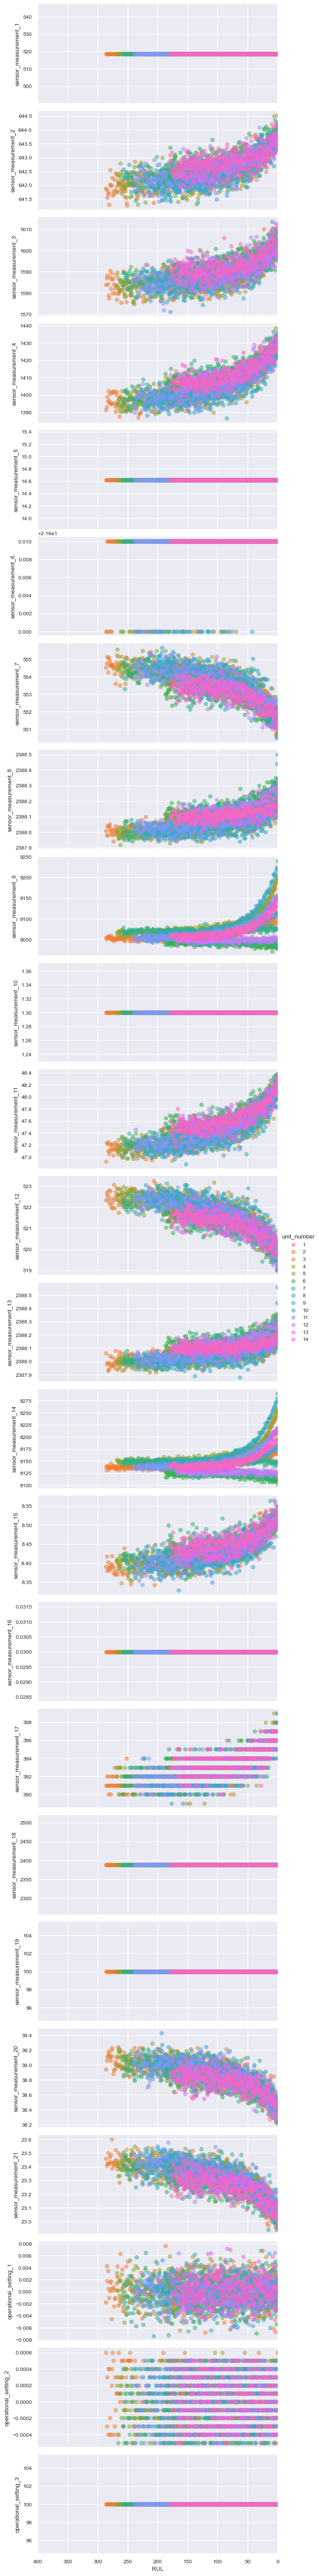

In [27]:
#RUL verileri azaldıkça sensörler nasıl gözküküyor
sensor_columns=[]
op_columns = []
sensor_columns += [f"sensor_measurement_{i}" for i in range(1, 22)]
op_columns=[f"operational_setting_{i}" for i in range (1,4)]
explore = sns.PairGrid(data=rul_train_1.query('unit_number < 15') ,
                 x_vars=["RUL"],
                 y_vars=sensor_columns + op_columns,
                 hue="unit_number", aspect=2.5)
explore = explore.map(plt.scatter, alpha=0.5)
explore = explore.set(xlim=(400,0))
explore = explore.add_legend()

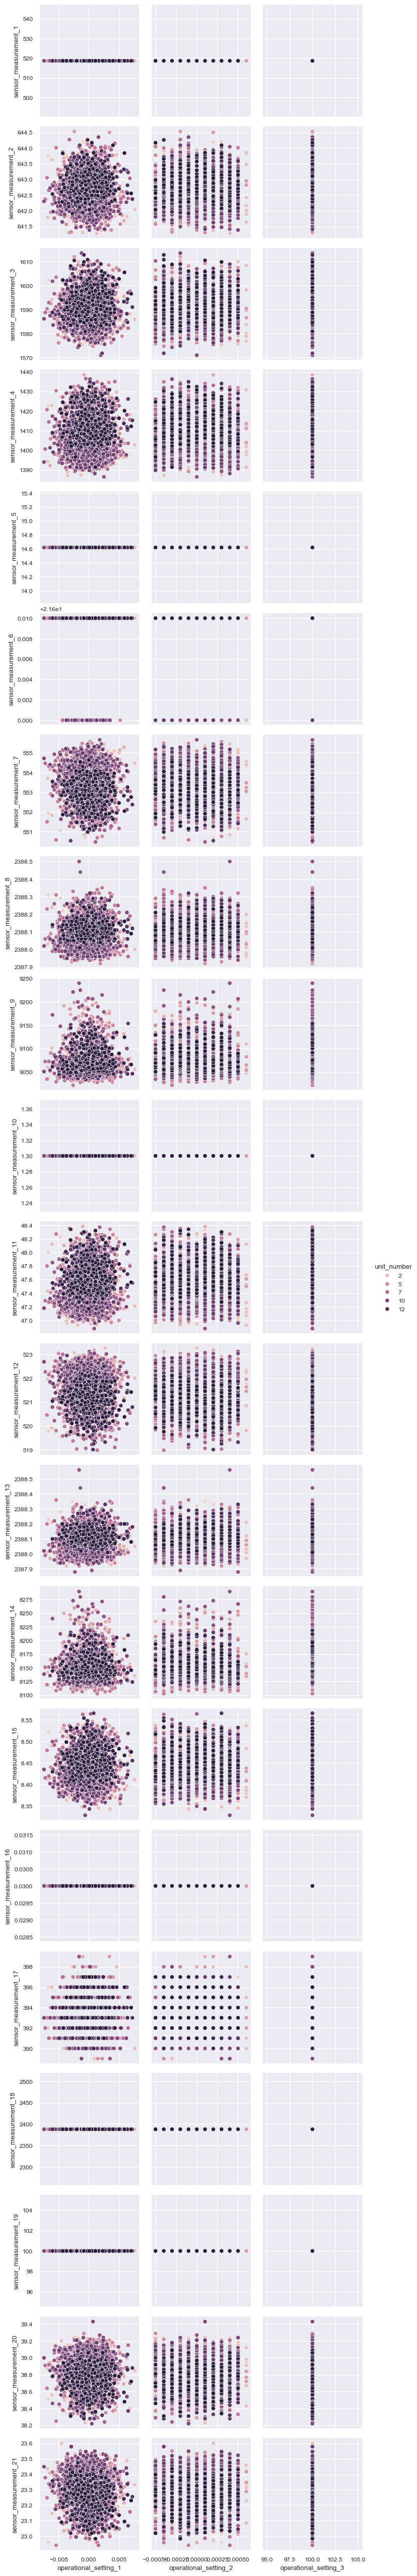

In [29]:
pair_plot = sns.pairplot(data=rul_train_1.query("unit_number < 15"),hue="unit_number",x_vars=op_columns,y_vars=sensor_columns,aspect=1)

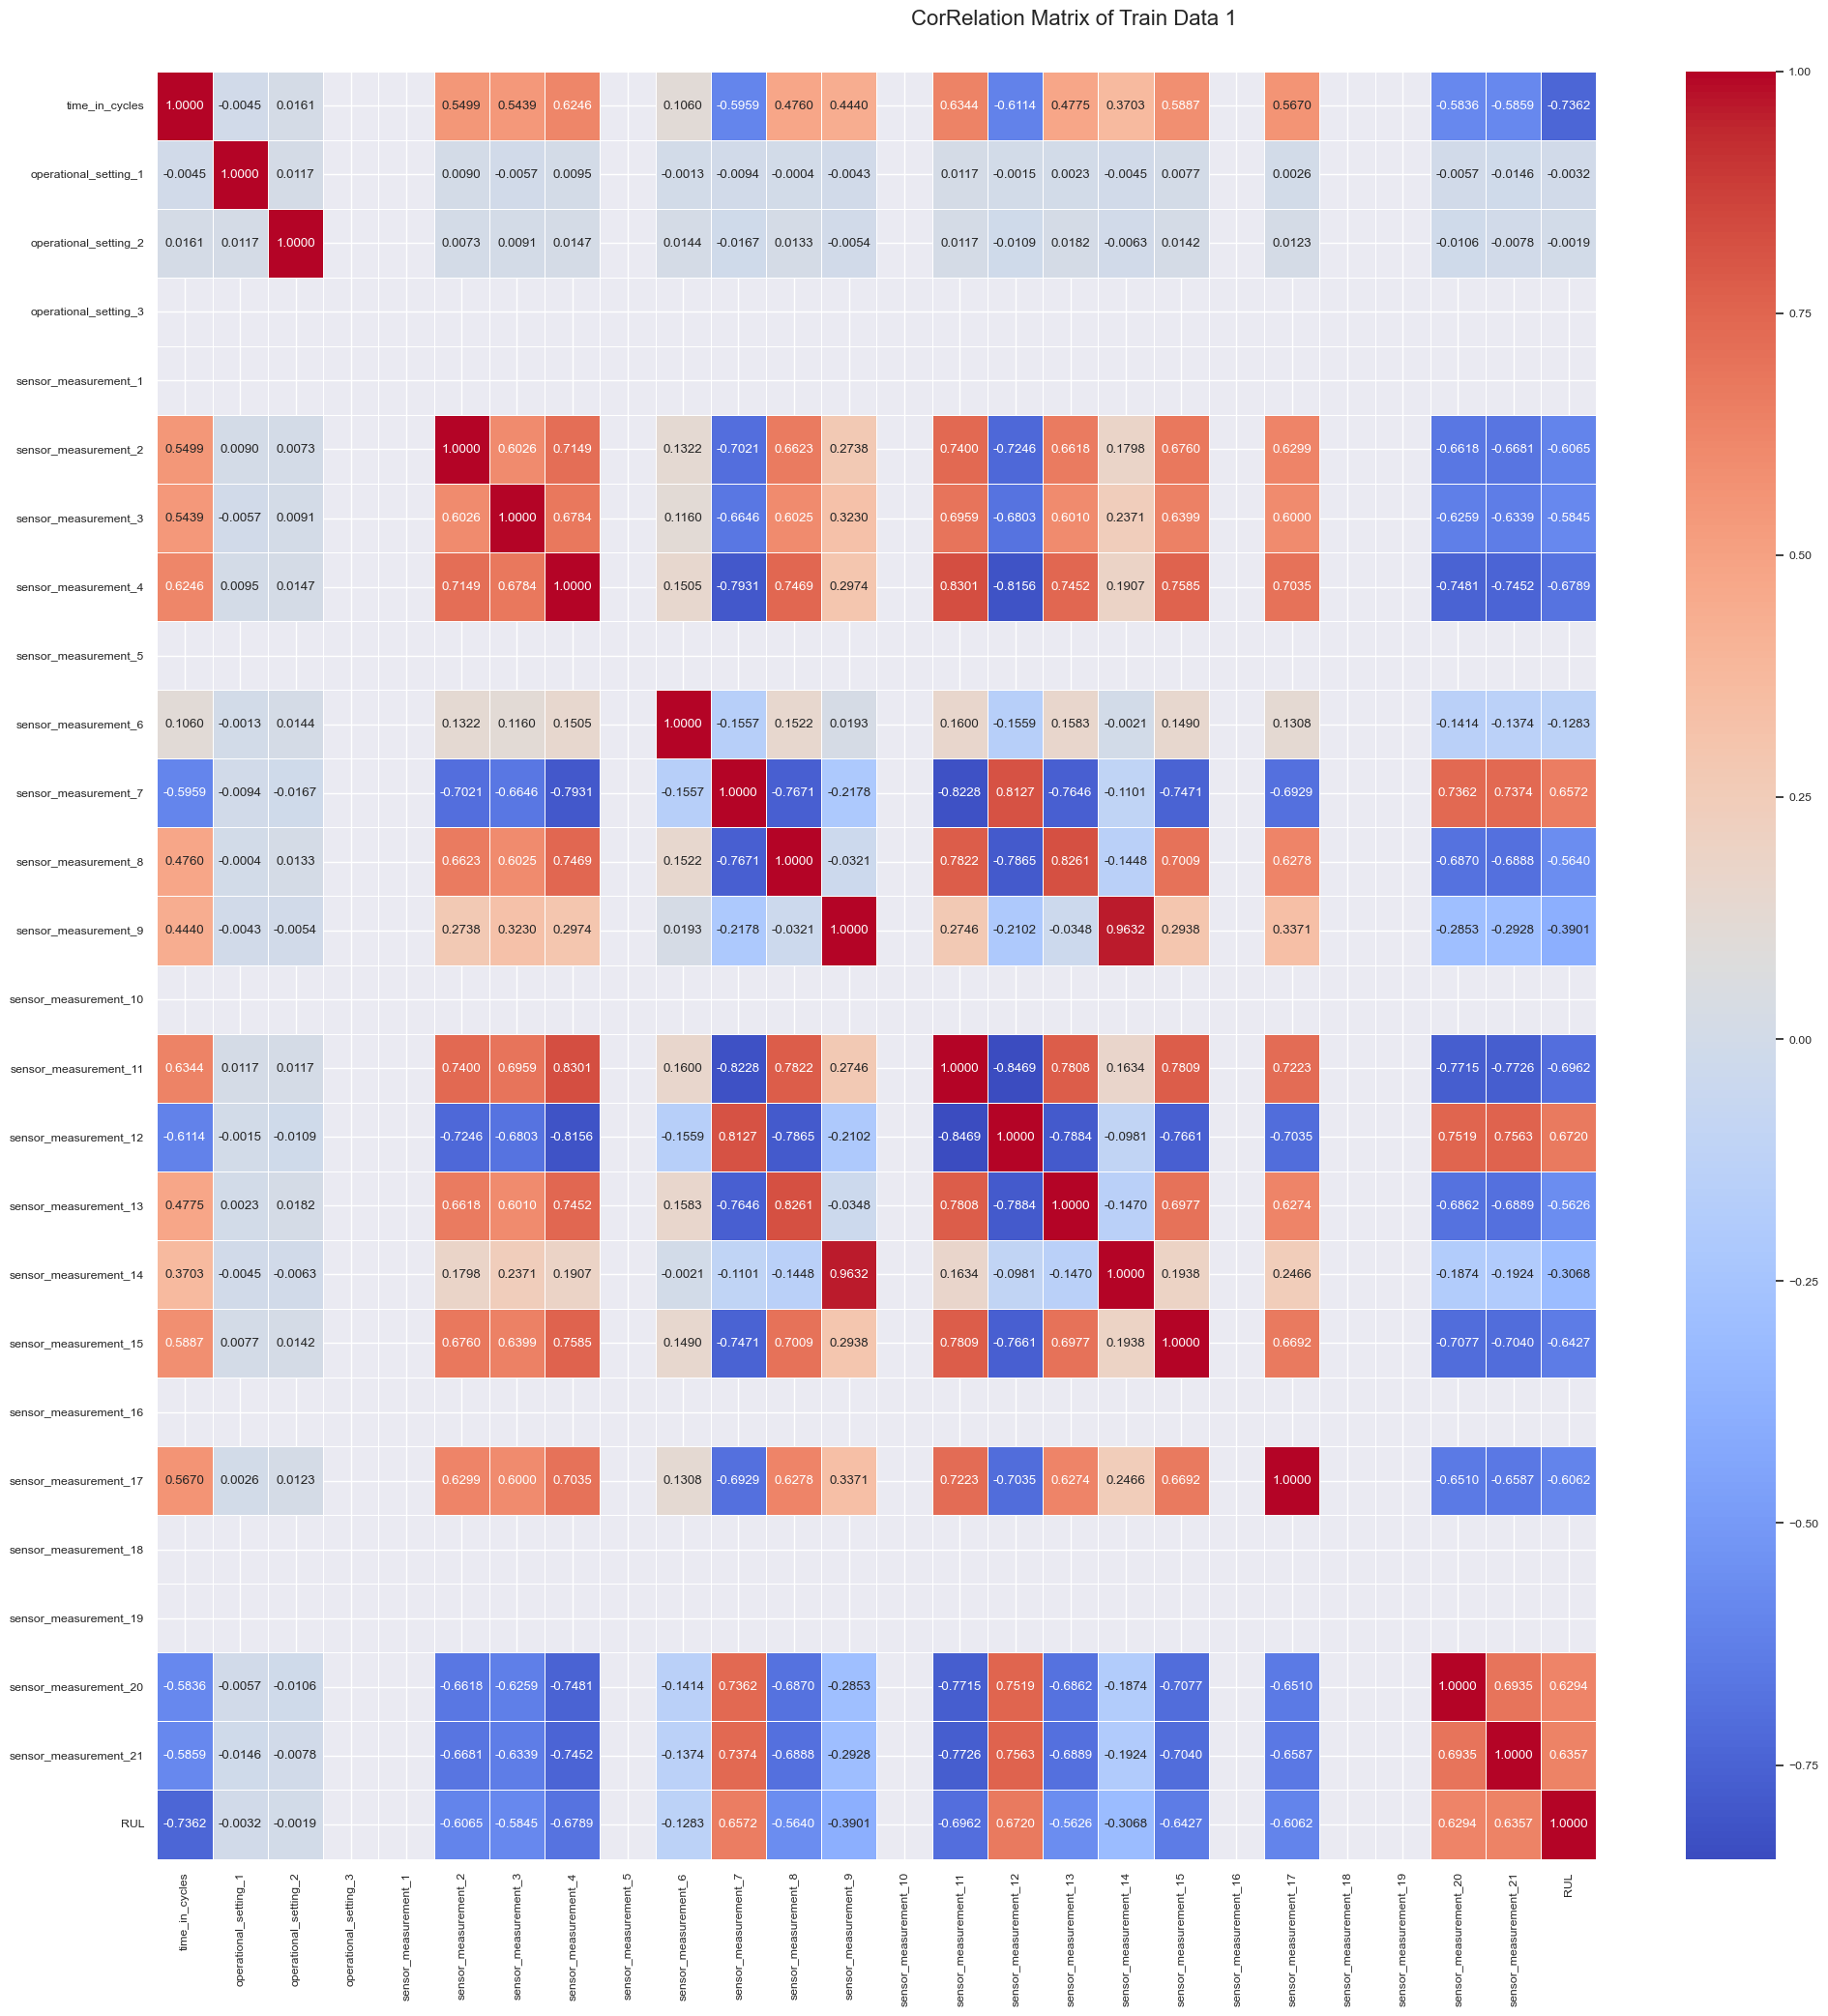

In [48]:
co_mat=rul_train_1.drop(columns=["unit_number"]).corr(numeric_only=True)
plt.figure(figsize=(24,24))
sns.heatmap(data=co_mat,cmap="coolwarm",xticklabels=True,yticklabels=True,cbar=True,annot=True,fmt=".4f",linewidths=.5)
plt.figtext(.45,0.9,"CorRelation Matrix of Train Data 1",fontsize=16)
plt.xticks(rotation=90)
plt.show()
